In [1]:
#Import Packages
##Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from scipy.signal import find_peaks

In [2]:
cols = ["wavelength", "intensity"]
raw_data = pd.read_csv("DataFiles/hydrogen_green_tube_multi_point1_300_900_nm.txt", delimiter="\t", names=cols)
raw_background = pd.read_csv("DataFiles/test_background_0.3.txt", delimiter="\t", names=cols)

raw_data

,wavelength,intensity
0,898.000,0.5864
1,897.875,0.5896
2,897.750,0.5864
3,897.625,0.5864
4,897.500,0.5864
...,...,...
4779,300.625,0.7311
4780,300.500,0.7334
4781,300.375,0.7327
4782,300.250,0.7311


In [3]:
peaks, properties = find_peaks(raw_data["intensity"], height=0, prominence=.12, distance=50, width=5)#, threshold=12, distance=1)#, width=2)

peaks

raw_data["wavelength"][peaks]

2122    632.750
3484    462.500
3898    410.750
4087    387.125
Name: wavelength, dtype: float64

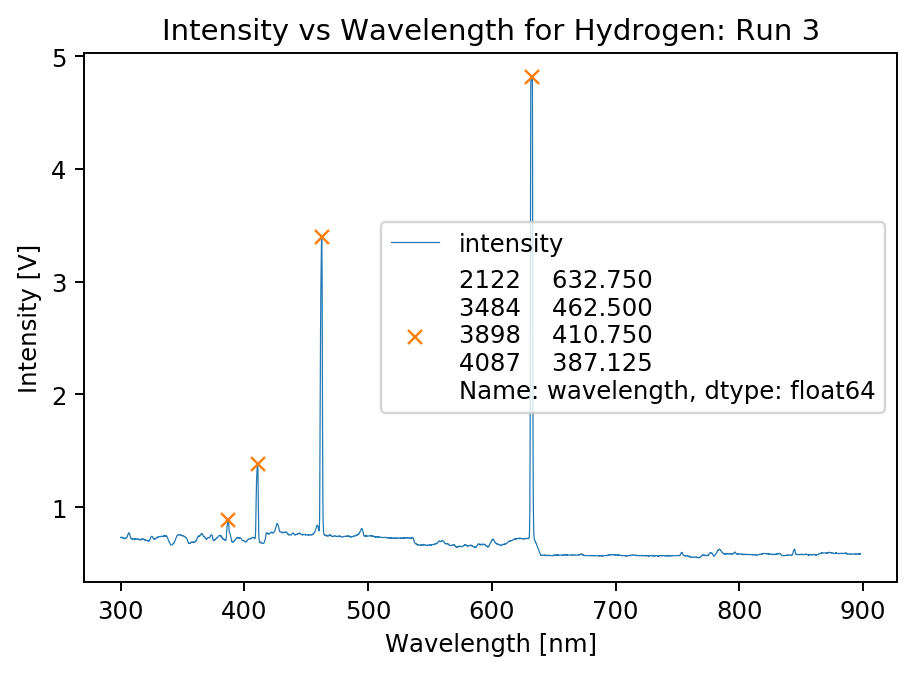

In [4]:
plt.figure(dpi=175)
plt.title("Intensity vs Wavelength for Hydrogen: Run 3")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [V]")
plt.plot(raw_data["wavelength"], raw_data["intensity"], lw=.5)
plt.plot(raw_data["wavelength"][peaks], raw_data["intensity"][peaks], "x", label=raw_data["wavelength"][peaks])
plt.legend()

plt.savefig("Plots/Hydrogen_Peaks.pdf")

In [5]:
properties#[2290]

{'peak_heights': array([4.8133, 3.399 , 1.3797, 0.8883]),
 'prominences': array([4.1718, 2.734 , 0.7013, 0.1997]),
 'left_bases': array([1048, 2490, 3864, 4061]),
 'right_bases': array([2490, 4451, 4451, 4451]),
 'widths': array([15.48554344, 14.03488803, 14.49929408, 15.97847368]),
 'width_heights': array([2.7274 , 2.032  , 1.02905, 0.78845]),
 'left_ips': array([2118.83573553, 3478.66214058, 3893.17935636, 4081.436     ]),
 'right_ips': array([2134.32127897, 3492.6970286 , 3907.67865044, 4097.41447368])}

In [6]:
366.875
424.750
479.250
564.875
645.000
684.000
755.375

755.375

In [7]:
raw_data["wavelength"][peaks]

2122    632.750
3484    462.500
3898    410.750
4087    387.125
Name: wavelength, dtype: float64

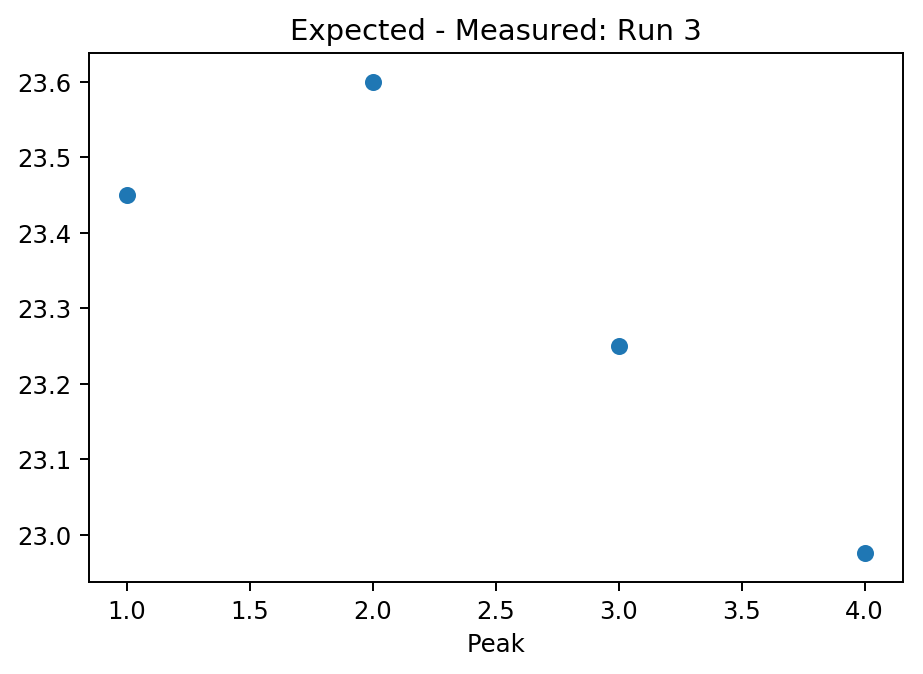

In [8]:
expected = np.array([656.2, 486.1, 434.0, 410.1])


plt.figure(dpi=175)
plt.title("Expected - Measured: Run 3")
plt.xlabel("Peak")

plt.scatter([1,2,3,4], (expected) - raw_data["wavelength"][peaks])

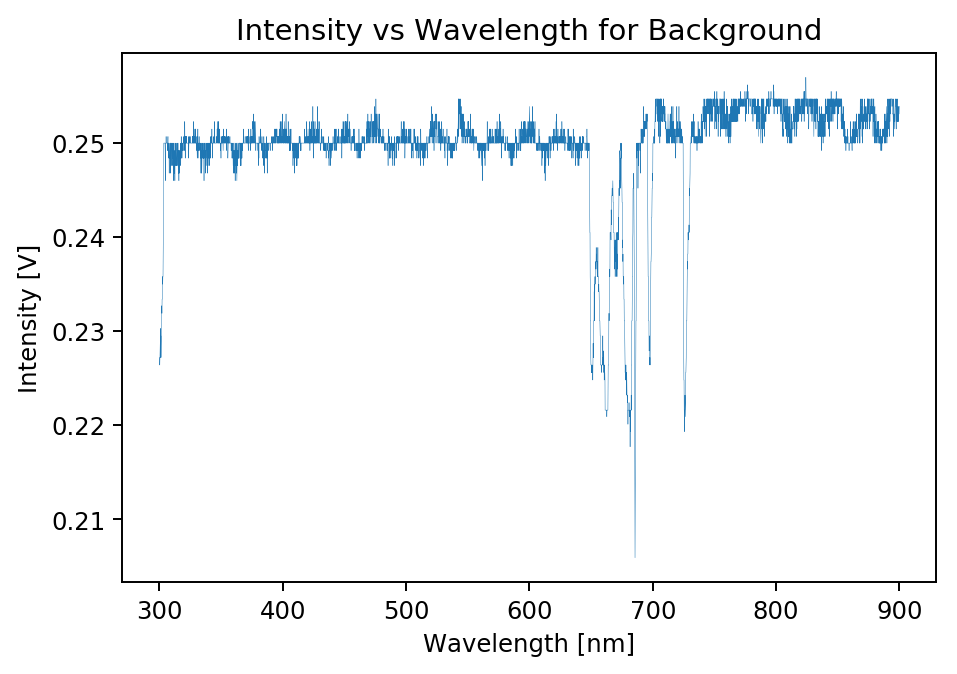

In [9]:
plt.figure(dpi=175)
plt.title("Intensity vs Wavelength for Background")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [V]")
plt.plot(raw_background["wavelength"], raw_background["intensity"], lw=.2)